# Multivariate gaussian

resources:
- [nice video lecture on gaussian processes](https://www.youtube.com/watch?v=92-98SYOdlY)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Two univariate gaussian

In [33]:
rng = np.random.default_rng() # random number generator
n = 10000
a = rng.normal(0.0, 1.0, n)
b = rng.normal(0.0, 1.0, n)

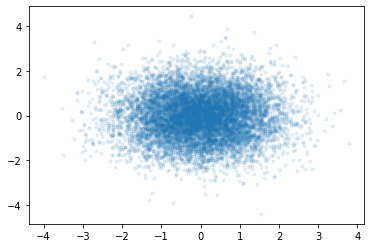

In [36]:
plt.plot(a,b,'.', alpha=.1)

# Correlation
The two variables were created independently, so, naturally, they are uncorelated, i.e. the way a vary doesn't influence the way b varies. We can verify that by computnig the covariance matrix

In [37]:
def covar(x,y):
    return np.mean((x - np.mean(x)) * (y - np.mean(y)))

covar_matrix = np.array([[covar(a,a), covar(a,b)],
                         [covar(b,a), covar(b,b)]])
covar_matrix

array([[0.99680107, 0.00227279],
       [0.00227279, 0.9666578 ]])

As the number of samples tend to infinity, this covar matrix will tend to [[1,0],[0,1]]

## Multivariate gaussian
A multivariate gaussian is defined by a mean and a covariance matrix

### Code from scratch

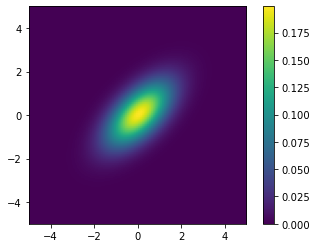

In [162]:
mu = 0.0
sigma = np.array([[1, .6],
                  [.6, 1]]) # covariance matrix
xmin = -5
xmax = 5
a, b = np.mgrid[xmin:xmax:.1, xmin:xmax:.1]
x = np.array([a.reshape(-1), b.reshape(-1)])
xc = x-mu # x centered
k = x.shape[0]
inv_sigma = np.linalg.inv(sigma)
f = np.apply_along_axis(lambda x: np.exp(-.5 * x.T @ inv_sigma @ x), axis=0, arr=xc)
f /= np.sqrt((2.0*np.pi)**k * np.linalg.det(sigma))
f = f.reshape(a.shape)
plt.imshow(f, origin='lower', extent=[xmin, xmax, xmin, xmax])
plt.colorbar()

### Using scipy

(-1.0, 0.99, -1.0, 0.99)

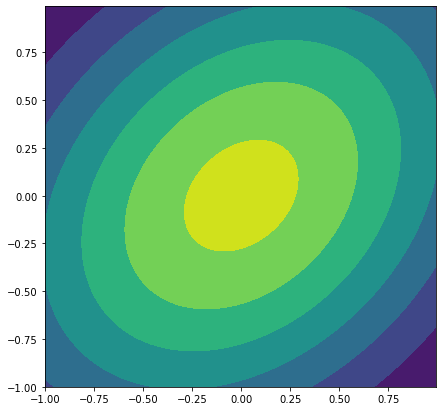

In [262]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.0, 0.0], [[1.0, 0.3], [0.3, 1.0]])
fig, ax = plt.subplots(1,1,figsize=[7,7])

ax.contourf(x, y, rv.pdf(pos))
plt.axis("equal")
plt.axis("tight")

# New visualization

In [250]:
# x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.0, 0.0, 0.0], [[1.0, 0.3, 0.1], [0.3, 1.0, 0.3], [0.1, 0.3, 1.0]])

0.06577661115289078

In [268]:
data = np.array([[.5, .1, 1.0]])

rv.pdf(data.T)

array([0.1376516 , 0.16556125, 0.07730841])